In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dtf = pd.read_csv('Expanded_data_with_more_features.csv')
print(dtf.head(10))


   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0           0  female         NaN   bachelor's degree      standard   
1           1  female     group C        some college      standard   
2           2  female     group B     master's degree      standard   
3           3    male     group A  associate's degree  free/reduced   
4           4    male     group C        some college      standard   
5           5  female     group B  associate's degree      standard   
6           6  female     group B        some college      standard   
7           7    male     group B        some college  free/reduced   
8           8    male     group D         high school  free/reduced   
9           9  female     group B         high school  free/reduced   

    TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0       none             married     regularly          yes         3.0   
1        NaN             married     sometimes          yes         

In [5]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
dtf.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
dtf.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop the unnamed column

In [12]:
dtf=dtf.drop("Unnamed: 0", axis=1)

In [13]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [14]:
dtf.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [18]:
dtf['WklyStudyHours']=dtf['WklyStudyHours'].str.replace("5 - 10 ","05-10")

In [29]:
dtf.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


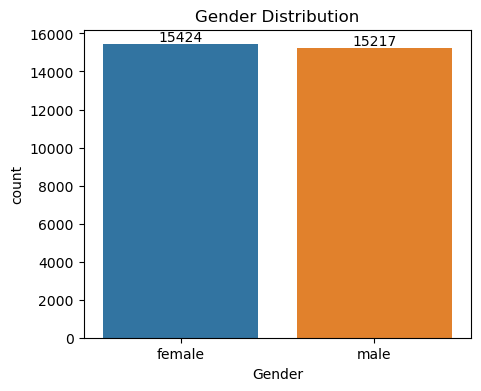

In [45]:
plt.figure(figsize=(5,4))
vish=sns.countplot(data=dtf,x='Gender')
for bars in vish.containers:
    vish.bar_label(bars)
plt.title("Gender Distribution")
plt.show()

In [30]:
# From this chart wecan analysis that females in the school are more than males.

In [34]:
gpb=dtf.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gpb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


In [35]:
#Where one data column is of string type and other are numric we will use heatmap


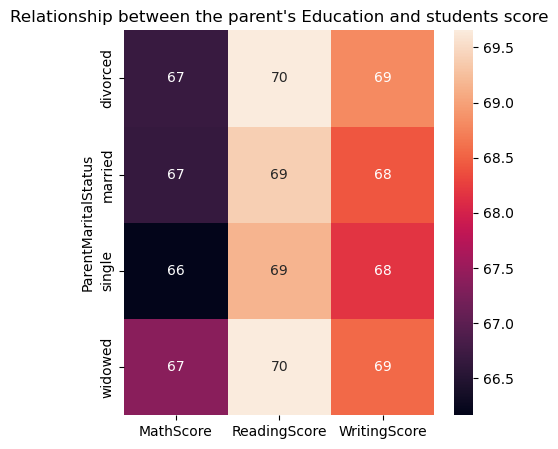

In [47]:
plt.figure(figsize=(5,5))
sns.heatmap(gpb,annot=True)
plt.title("Relationship between the parent's Education and students score")
plt.show()

In [38]:
# FROM THIS HEAT CHART WE CAN CONCLUDE THAT THE EDUCATION OF THE PARENTS HAVE A GOOD IMPACT ON THE STUDENTS SCORE IN VARIOUS SUBJECT

In [39]:
gpb=dtf.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gpb)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


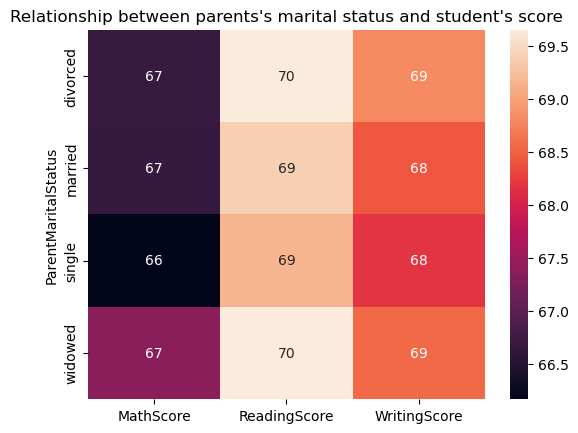

In [48]:
sns.heatmap(gpb,annot=True)
plt.title("Relationship between parents's marital status and student's score")
plt.show()

In [44]:
#From the above chart we conclude that ther is negigible imapct of their parents marital status

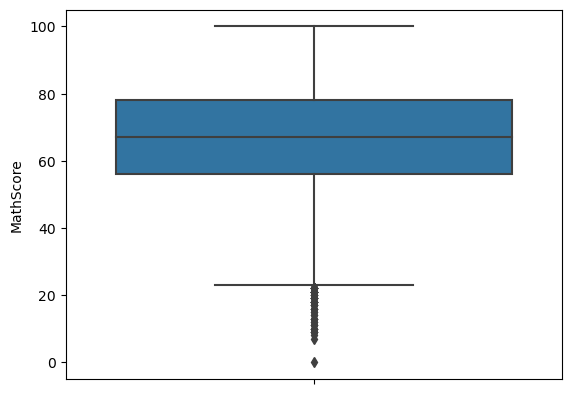

In [49]:
sns.boxplot(data=dtf,y="MathScore")
plt.show()

In [50]:
# Here from this chart we can see there is many outliers and there is one student who get 0 marks in mathematics

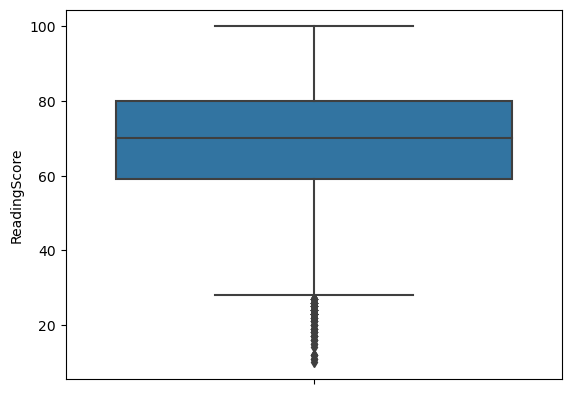

In [51]:
sns.boxplot(data=dtf,y="ReadingScore")
plt.show()

In [52]:
# FROM HER WE CAN OBSERVE THERE IS ALSO MANY OUTLIERS BUT NO ONE GET 0 MARKS IN READING 


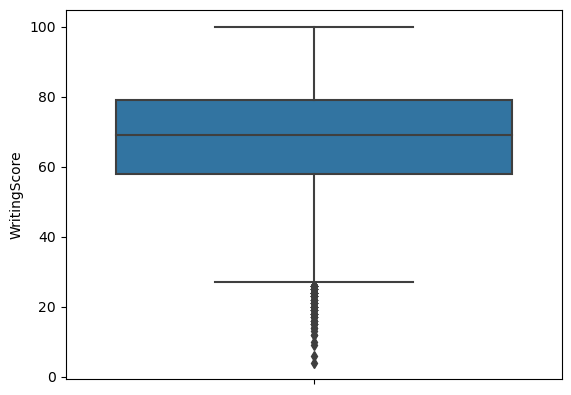

In [53]:
sns.boxplot(data=dtf,y="WritingScore")
plt.show()

In [54]:
# From here we can find there is also  many outliers but no students got 0 marks in writting

# from all these we can conclude maths is litle bit tough subject for students

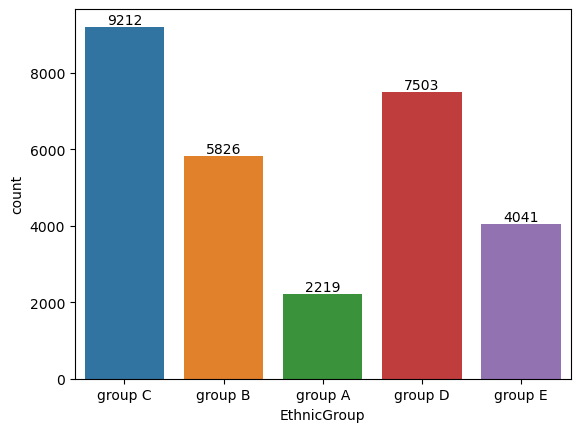

In [57]:

ax=sns.countplot(data=dtf,x="EthnicGroup")
ax.bar_label(ax.containers[0])

plt.show()

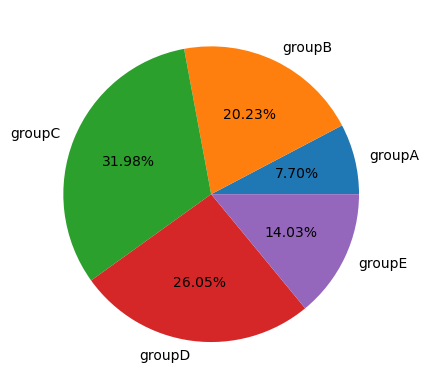

In [65]:
groupA=dtf.loc[(dtf["EthnicGroup"]=="group A")].count()
groupB=dtf.loc[(dtf["EthnicGroup"]=="group B")].count()
groupC=dtf.loc[(dtf["EthnicGroup"]=="group C")].count()
groupD=dtf.loc[(dtf["EthnicGroup"]=="group D")].count()
groupE=dtf.loc[(dtf["EthnicGroup"]=="group E")].count()
l =["groupA","groupB","groupC","groupD","groupE"]
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist,labels=l,autopct="%1.2f%%")
plt.show()

In [66]:
dtf.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [67]:
gpb=dtf.groupby("LunchType").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gpb)

              MathScore  ReadingScore  WritingScore
LunchType                                          
free/reduced  58.862332     64.189735     62.650522
standard      70.709370     72.175634     71.529716


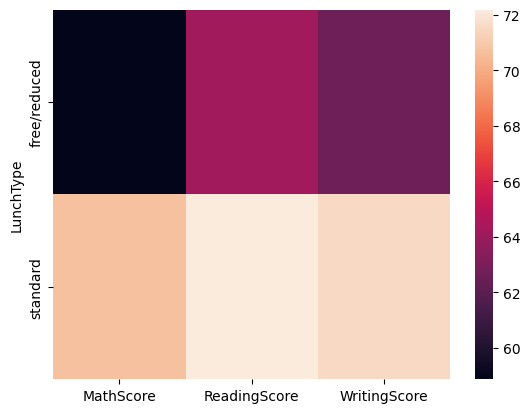

In [68]:
sns.heatmap(gpb)
plt.show()

# From here we conclude that standard lunch has a good impact compare to free/reduced lunch

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


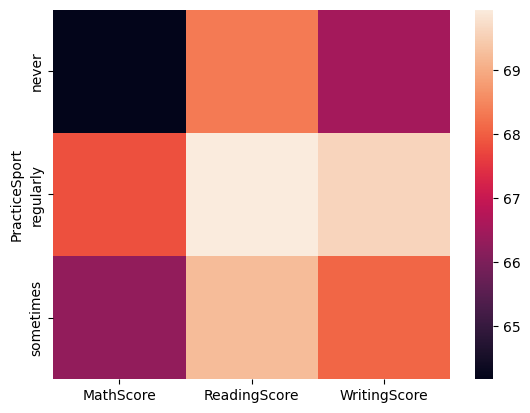

In [69]:
gpb=dtf.groupby("PracticeSport").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gpb)
sns.heatmap(gpb)
plt.show()

In [70]:
# from here we can conclude that students who do regular sport practice have  got better marks in all subject.

# from all above EDA we can say the students who's parents are more eduacted , have standard meal,practice sport daily got good marks